In [1]:
!pip install tensorflow-gpu

In [2]:
!nvidia-smi

Sun Apr 11 09:45:15 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import tensorflow as tf

# **Import the libraries**

In [4]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [5]:
size = 100
IMAGE_SIZE = [size,size ]
path = '/content/drive/MyDrive/Datasets/BasicFinalDatabase100Basic/'

train_path = path + 'Train'
test_path = path + 'Test'

In [6]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [7]:
# don't train existing weights
# for layer in inception.layers:
#     layer.trainable = False

folders = glob(train_path + '/*')

folders

['/content/drive/MyDrive/Datasets/BasicFinalDatabase100Basic/Train/181',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase100Basic/Train/178',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase100Basic/Train/172',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase100Basic/Train/177',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase100Basic/Train/179',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase100Basic/Train/174',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase100Basic/Train/180',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase100Basic/Train/176',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase100Basic/Train/173',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase100Basic/Train/175',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase100Basic/Train/182',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase100Basic/Train/187',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase100Basic/Train/189',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabas

In [8]:
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 49, 49, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 49, 49, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 49, 49, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [9]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('handwrittern bangla letter100v2.h5', verbose=1, save_best_only=True)
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (size, size),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 12036 images belonging to 50 classes.


In [12]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (size, size),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3000 images belonging to 50 classes.


In [13]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  callbacks=[anne, checkpoint],
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
377/377 [==============================] - 77s 180ms/step - loss: 3.4648 - accuracy: 0.1528 - val_loss: 4.1674 - val_accuracy: 0.4707

Epoch 00001: val_loss improved from inf to 4.16744, saving model to handwrittern bangla letter100v2.h5
Epoch 2/100
377/377 [==============================] - 65s 171ms/step - loss: 1.4274 - accuracy: 0.6227 - val_loss: 2.0635 - val_accuracy: 0.7700

Epoch 00002: val_loss improved from 4.16744 to 2.06352, saving model to handwrittern bangla letter100v2.h5
Epoch 3/100
377/377 [==============================] - 65s 172ms/step - loss: 0.9531 - accuracy: 0.7425 - val_loss: 11.5697 - val_accuracy: 0.5113

Epoch 00003: val_loss did not improve from 2.06352
Epoch 4/100
377/377 [==============================] - 65s 173ms/step - loss: 0.9297 - accuracy: 0.7439 - val_loss: 0.9765 - val_accuracy: 0.8197

Epoch 00004: val_loss improved from 2.06352 to 0.97654, saving model to handwrittern bangla letter100v2.h5
Epoch 5/100
377/377 [======================

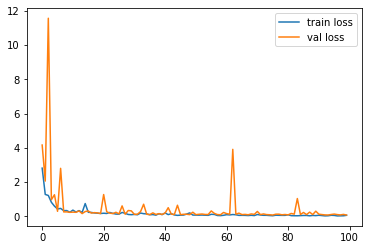

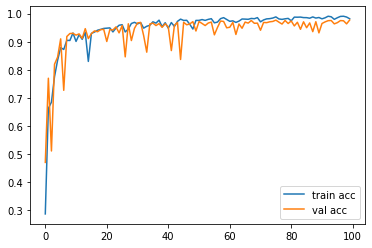

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('handwrittern bangla letter100v2.h5')

In [16]:
y_pred = model.predict(test_set)
y_pred

array([[2.5621161e-15, 2.0874741e-13, 7.2855799e-10, ..., 1.7272281e-11,
        4.3154334e-11, 4.4185858e-16],
       [1.9764874e-13, 1.2792529e-16, 6.4507294e-22, ..., 6.9302176e-13,
        1.7402212e-15, 1.0000000e+00],
       [1.8404590e-09, 3.5616052e-09, 1.4354303e-09, ..., 3.2948124e-06,
        1.2699573e-11, 1.7354396e-04],
       ...,
       [1.3109119e-04, 5.2481875e-05, 6.8159585e-07, ..., 3.8712597e-06,
        1.1340842e-06, 9.0610399e-04],
       [4.7276972e-04, 1.0211412e-05, 2.6031582e-10, ..., 2.6169137e-06,
        5.2058748e-09, 9.9937147e-01],
       [2.0025668e-18, 1.7001983e-18, 2.7986117e-11, ..., 3.6233795e-22,
        2.6612917e-18, 1.0339914e-26]], dtype=float32)

In [17]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model=load_model('handwrittern bangla letter100v2.h5')
new_model = tf.keras.models.load_model('handwrittern bangla letter100v2.h5')

# Check its architecture
new_model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 49, 49, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 49, 49, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 49, 49, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [18]:
loss, acc = new_model.evaluate(test_set, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))


94/94 - 7s - loss: 0.0822 - accuracy: 0.9770
Restored model, accuracy: 97.70%
